<a href="https://colab.research.google.com/github/deepanshBatra/imageClassificationCNN/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Y_train.shape

(50000, 1)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
Y_train = Y_train.reshape(-1,)
Y_train.shape

(50000,)

In [ ]:
def plotImage(X_train, Y_train, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(labels[Y_train[index]])

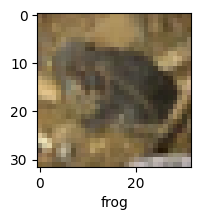

In [ ]:
plotImage(X_train, Y_train, 23)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.3033 - loss: 1.9337
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.4211 - loss: 1.6409
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.4533 - loss: 1.5490
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.4734 - loss: 1.4946
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 76ms/step - accuracy: 0.4944 - loss: 1.4331


In [ ]:
ann.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4807 - loss: 1.4495


[1.4563097953796387, 0.4779999852180481]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.43      0.52      1000
           1       0.73      0.38      0.50      1000
           2       0.42      0.30      0.35      1000
           3       0.38      0.27      0.31      1000
           4       0.45      0.37      0.41      1000
           5       0.47      0.28      0.35      1000
           6       0.46      0.65      0.54      1000
           7       0.40      0.69      0.51      1000
           8       0.52      0.73      0.61      1000
           9       0.46      0.69      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6592 - loss: 0.9797
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6752 - loss: 0.9377
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.6834 - loss: 0.9132
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6953 - loss: 0.8855
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7068 - loss: 0.8462
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7175 - loss: 0.8056
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7338 - loss: 0.7741
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7381 - loss: 0.7552
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 38ms/step - accuracy: 0.7469 - loss: 0.7337
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7590 - loss: 0.7004


In [ ]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6733 - loss: 0.9623


[0.9708669781684875, 0.6736999750137329]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      1000
           1       0.81      0.78      0.79      1000
           2       0.54      0.57      0.55      1000
           3       0.64      0.29      0.40      1000
           4       0.51      0.73      0.60      1000
           5       0.67      0.49      0.57      1000
           6       0.70      0.81      0.75      1000
           7       0.66      0.79      0.72      1000
           8       0.83      0.76      0.79      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
# Save the CNN model
cnn.save('cifar10_cnn_model.h5')